## Introduction


In this project, we aim to build a classification model to predict whether a credit card transaction is fraudulent or not. The dataset contains transactions made by credit cards in September 2013 by European cardholders. Out of 284,807 transactions, 492 are fraudulent, making up 0.172% of all transactions. This dataset is highly imbalanced, requiring specific techniques to handle the imbalance effectively.


In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Overview

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\shubh\Downloads\upgrad assets\credit card project\credit-card-fraud-detection\data\raw_data\creditcard.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Statistical overview of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Class distribution
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
(data.groupby('Class')['Class'].count()/data['Class'].count()) * 100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The dataset consists of 284,807 transactions with 31 features, including 'Time', 'Amount', and 28 anonymized features labeled V1 to V28. The target variable 'Class' indicates whether a transaction is fraudulent (1) or not (0). There are no missing values in the dataset.

## Exploratory Data Analysis (EDA)


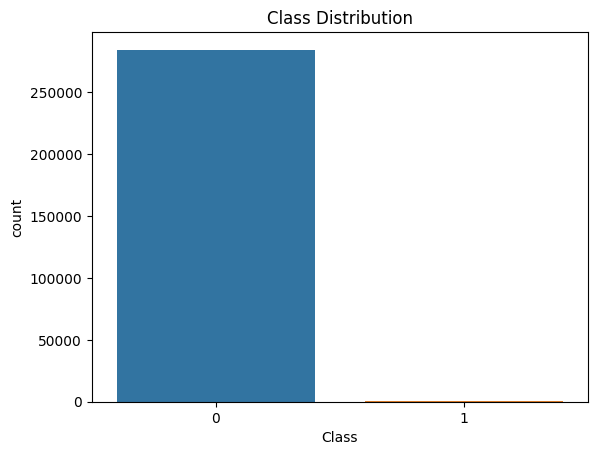

In [10]:
# Plotting class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

The dataset is highly imbalanced, with the majority of transactions being non-fraudulent (Class 0). Fraudulent transactions (Class 1) make up only 0.17% of the dataset.

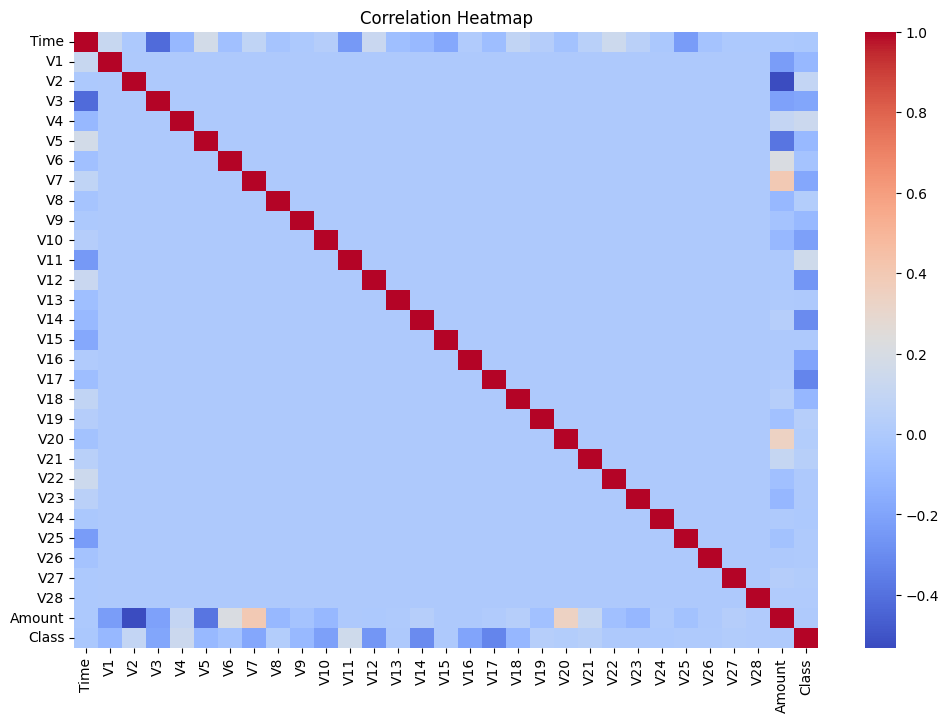

In [11]:
# Plotting correlation heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap indicates that there are no extremely strong correlations among the features, suggesting that multicollinearity is not a significant concern.

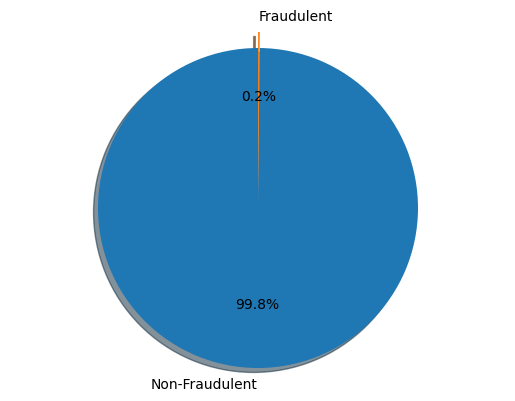

In [12]:
# Pie chart for class distribution
classes = data['Class'].value_counts()
normal_share = classes[0] / data['Class'].count() * 100
fraud_share = classes[1] / data['Class'].count() * 100

labels = 'Non-Fraudulent', 'Fraudulent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

The pie chart further illustrates the significant imbalance between fraudulent and non-fraudulent transactions, with fraudulent transactions accounting for only 0.17% of the total transactions.

In [13]:
print('The percentage without churn prediction is ', round(data['Class'].value_counts()[0]/len(data) * 100, 2), '% of the dataset')
print('The percentage with churn prediction is ', round(data['Class'].value_counts()[1]/len(data) * 100, 2), '% of the dataset')
print('The ratio of imbalance is', round(data['Class'].value_counts()[1]/data['Class'].value_counts()[0] * 100, 2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


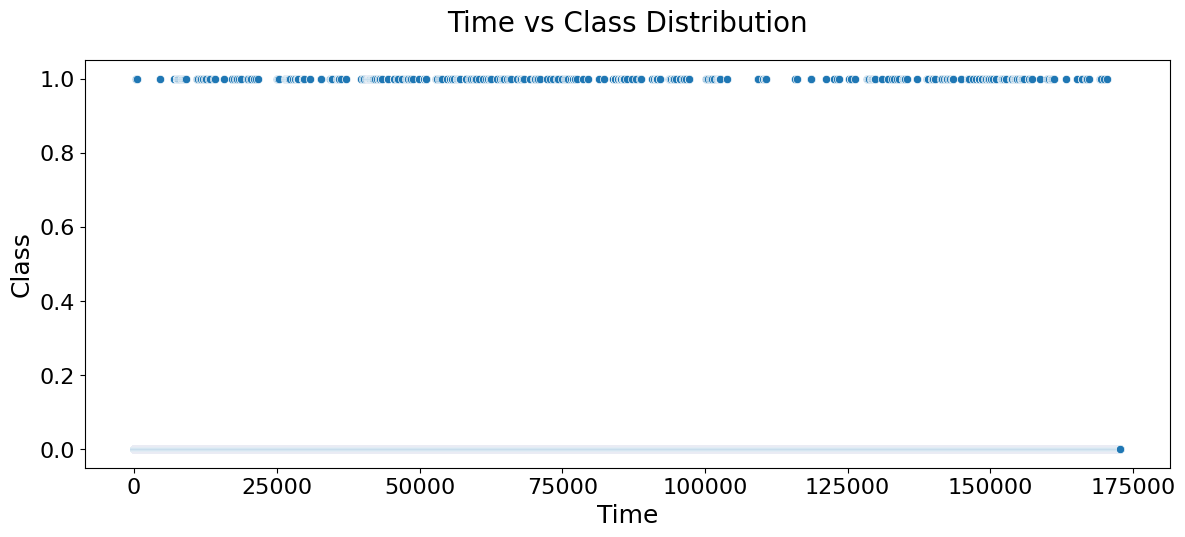

In [14]:
# Scatter plot for Time vs Class
Delta_Time = pd.to_timedelta(data['Time'], unit='s')
data['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
data['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
data['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

plt.subplot(3, 1, 1)
sns.scatterplot(x=data['Time'], y='Class', palette=cmap, data=data)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Time vs Class Distribution', size=20, y=1.05)
plt.show()

The scatter plot of 'Time' vs 'Class' does not show any distinct pattern indicating that fraud occurs uniformly over the period captured by the 'Time' feature.

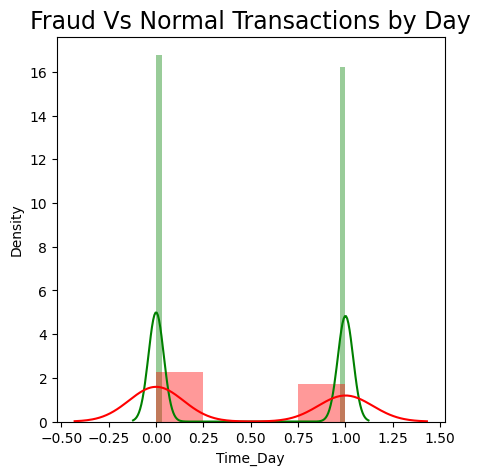

In [15]:
# Fraud Vs Normal transactions by day
plt.figure(figsize=(5, 5))
sns.distplot(data[data['Class'] == 0]["Time_Day"], color='green')
sns.distplot(data[data['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

The distribution of fraudulent and non-fraudulent transactions by day appears similar, suggesting that fraud occurs consistently across different days.

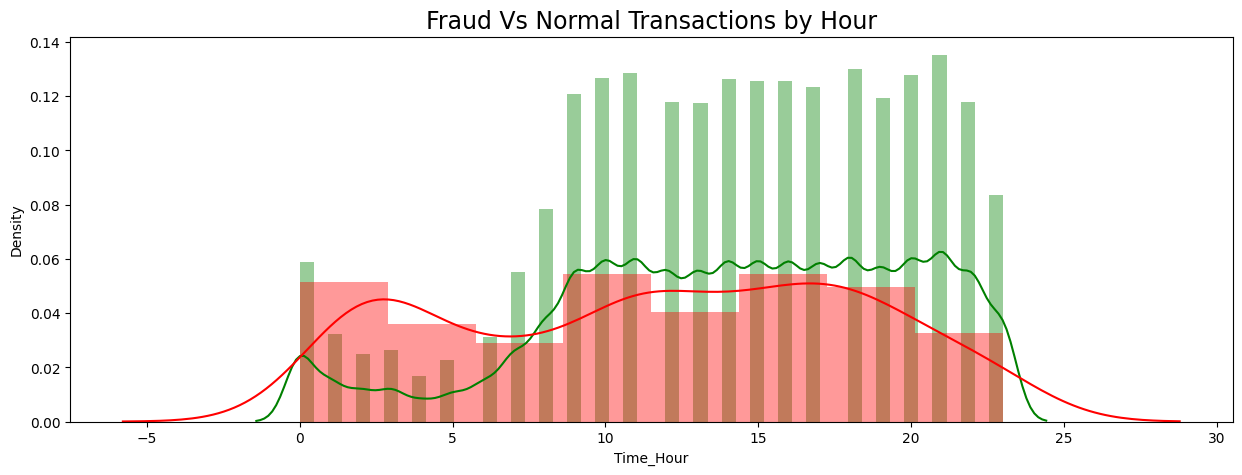

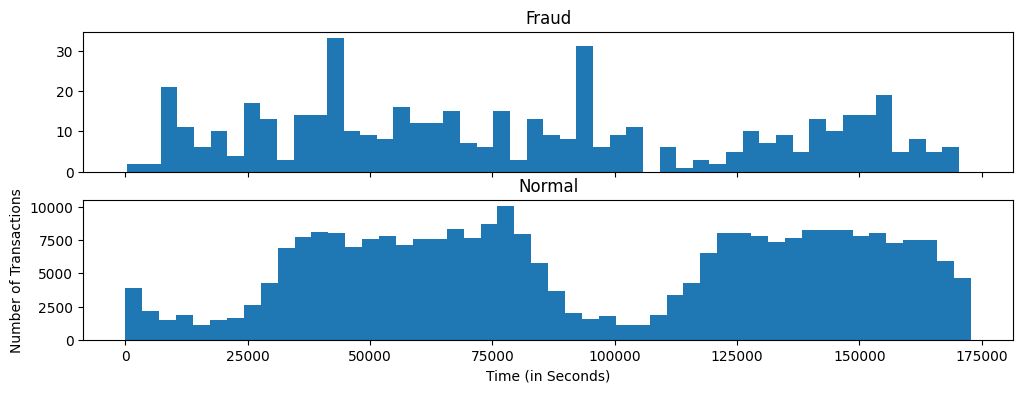

In [16]:
# Fraud Vs Normal transactions by hour
plt.figure(figsize=(15, 5))
sns.distplot(data[data['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(data[data['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
bins = 50

ax1.hist(data.Time[data.Class == 1], bins=bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The hourly distribution of fraudulent and non-fraudulent transactions shows that fraud is more prevalent during certain hours of the day.


In [17]:
# Scatter plot for Amount vs Class
df_Fraud = data[data['Class'] == 1]
df_Regular = data[data['Class'] == 0]

In [18]:
# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [19]:
# Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


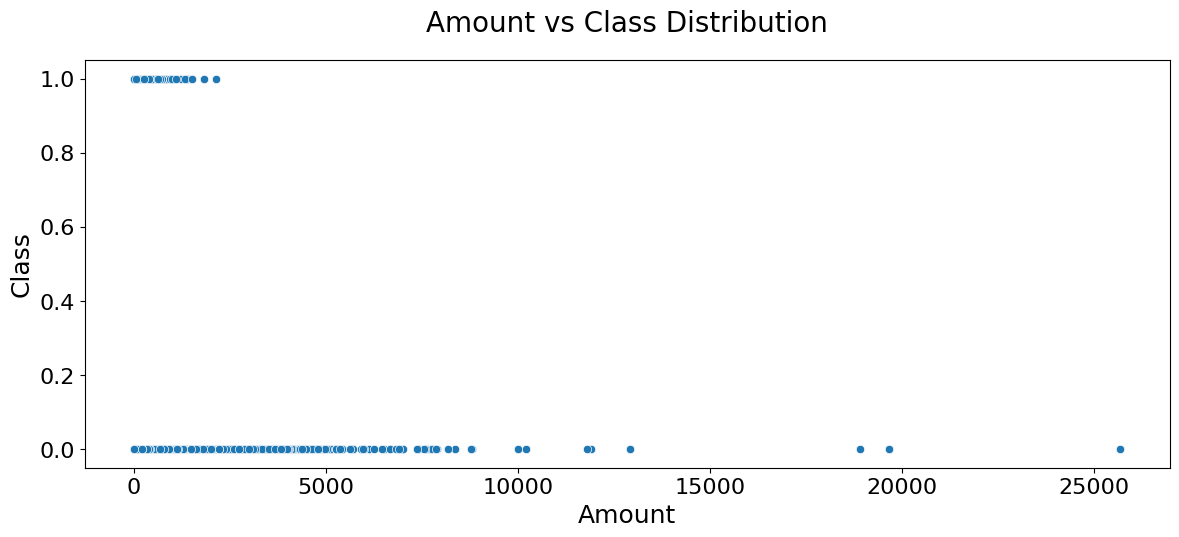

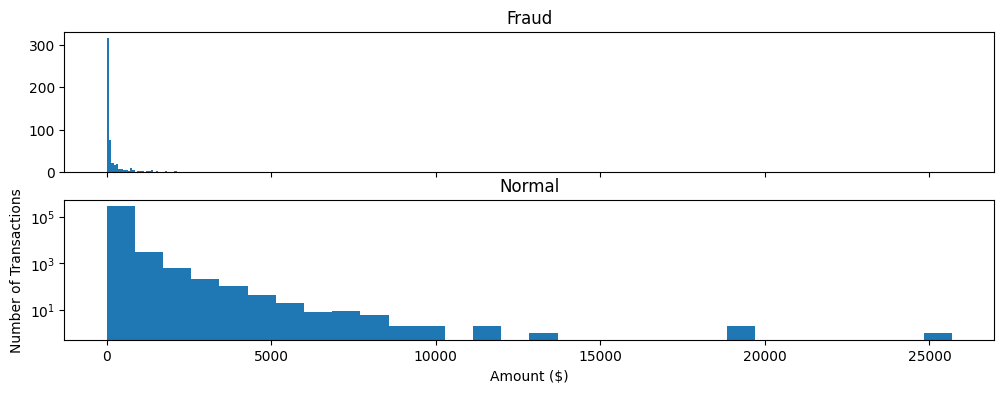

In [20]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

plt.subplot(3, 1, 1)
sns.scatterplot(x=data['Amount'], y='Class', palette=cmap, data=data)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Amount vs Class Distribution', size=20, y=1.05)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
bins = 30

ax1.hist(data.Amount[data.Class == 1], bins=bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Fraudulent transactions tend to have higher amounts on average compared to non-fraudulent ones. The scatter plot and histograms show that while fraud can occur at various transaction amounts, there is a noticeable concentration of higher amounts among fraudulent transactions.

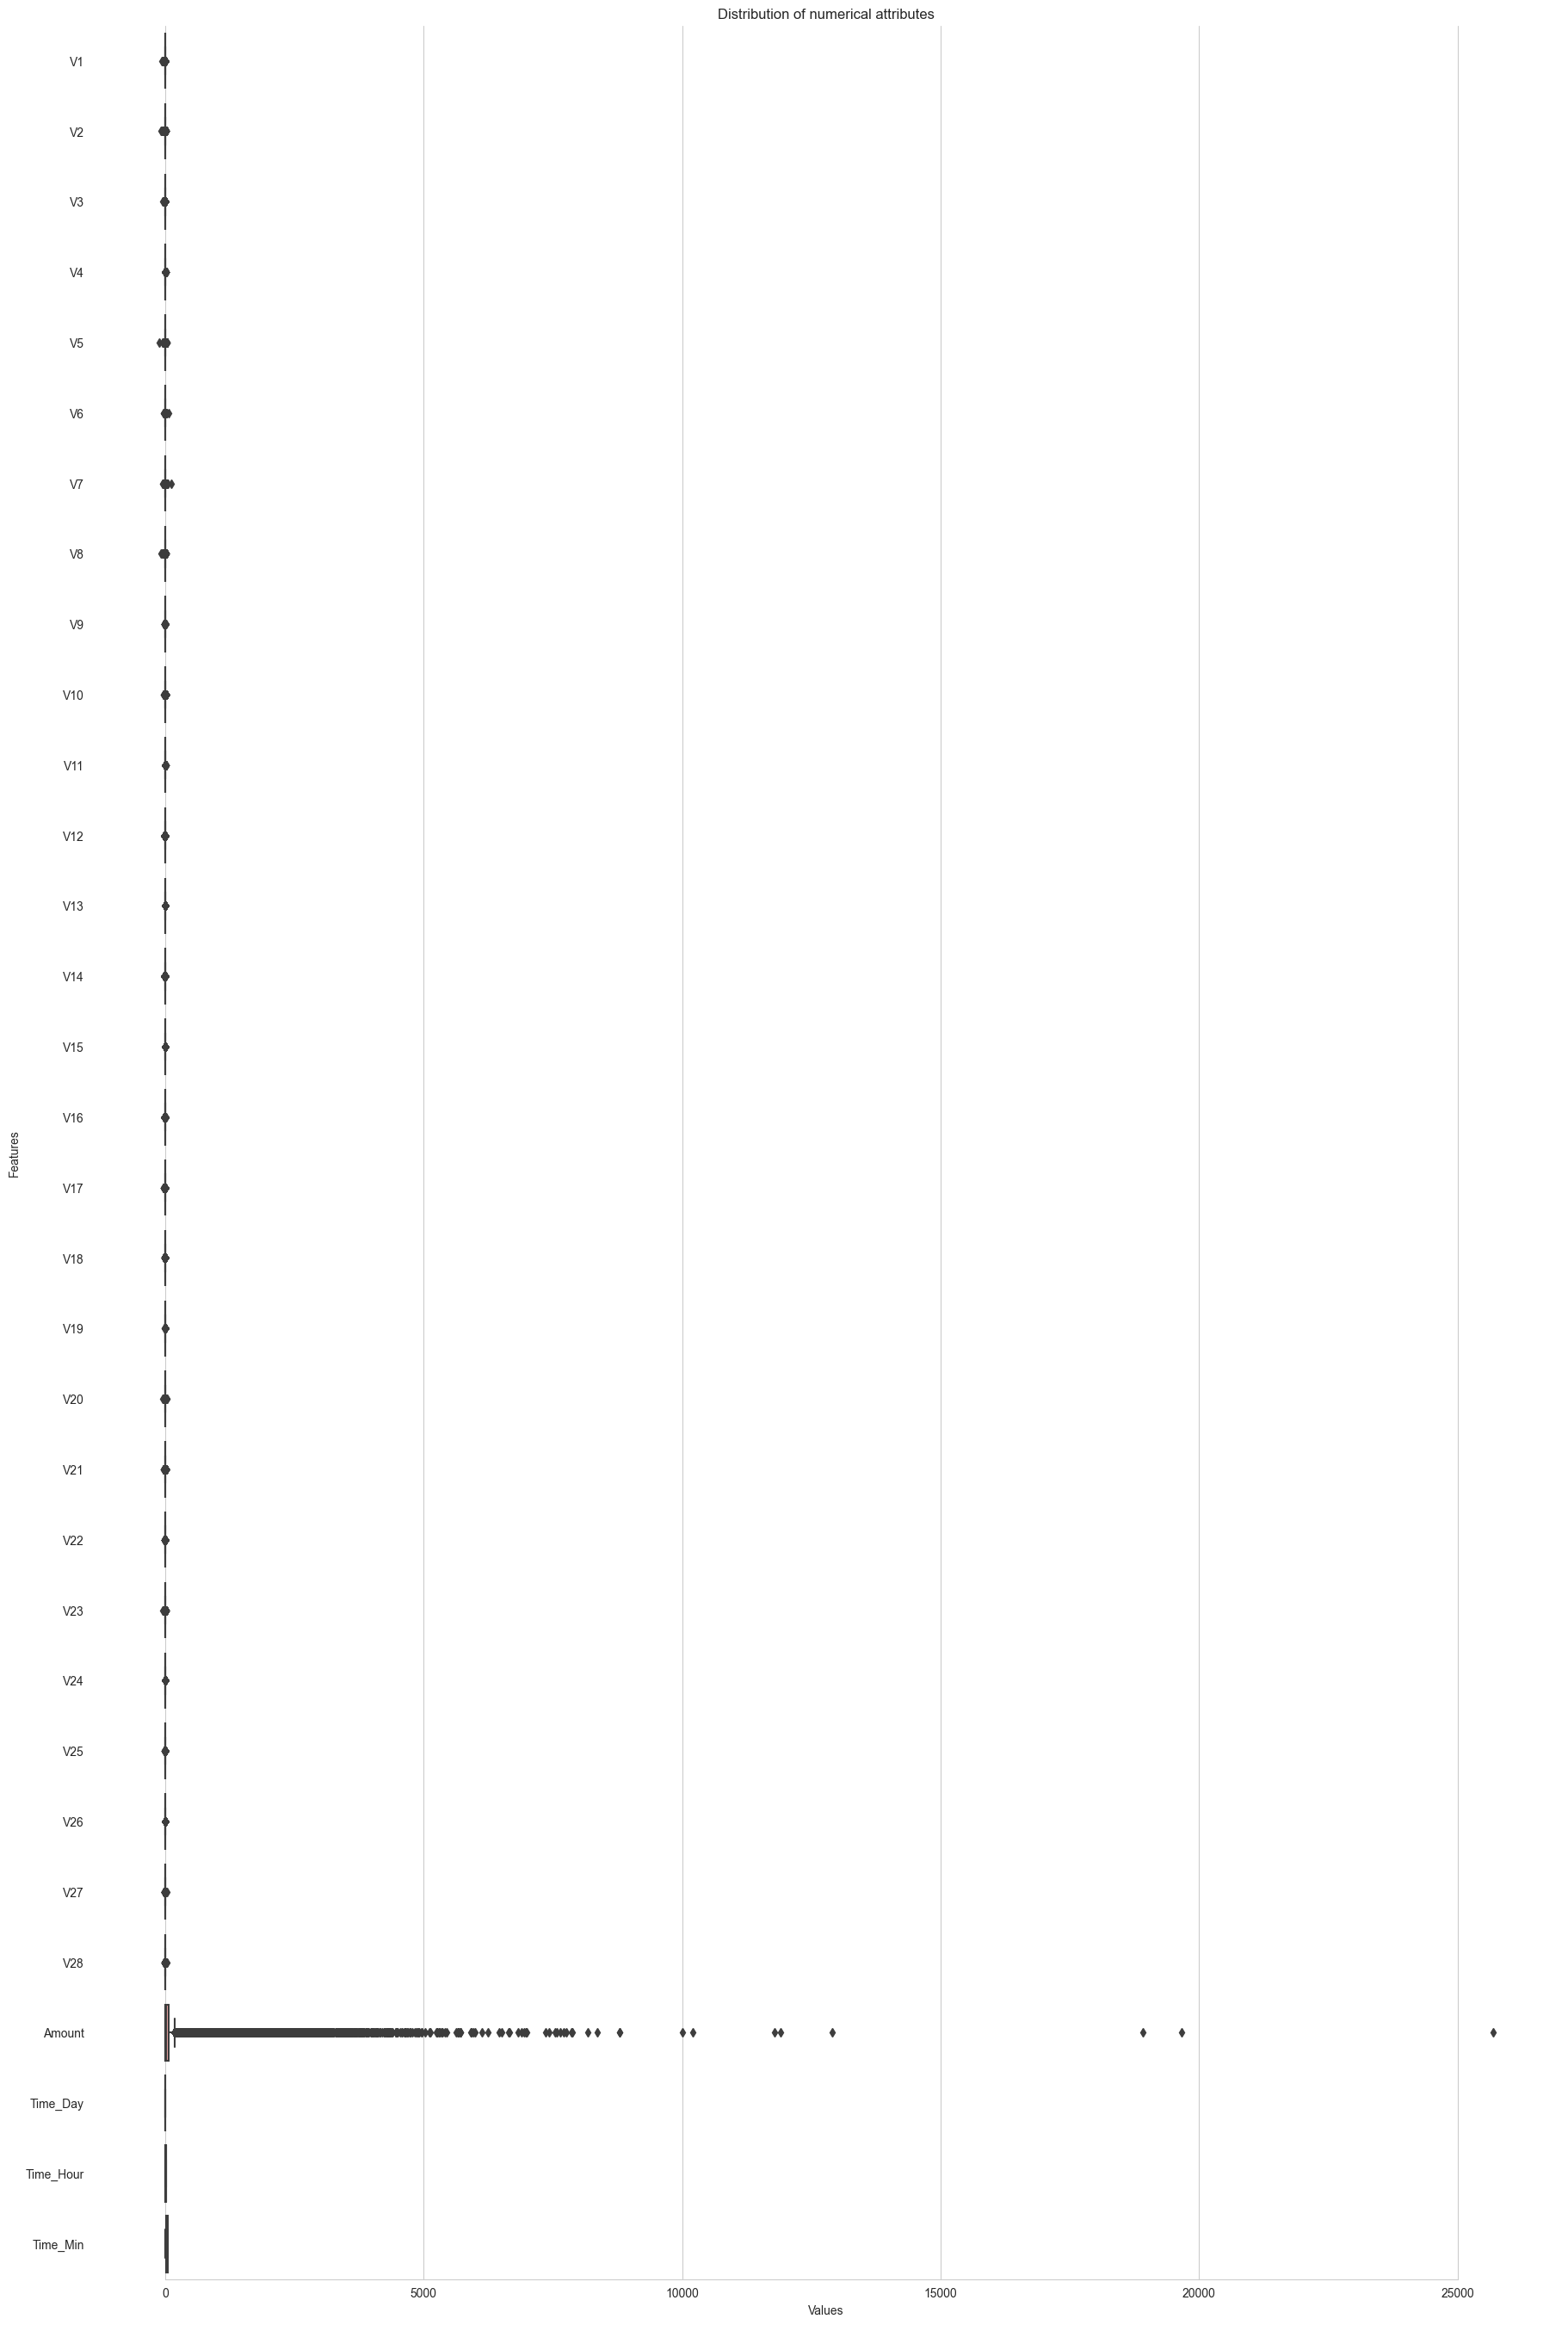

In [21]:
# Boxplot for numerical attributes
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
li_not_plot = ['Class', 'Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22, 34))
ax = sns.boxplot(data=data[li_transform_num_feats], orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical attributes")
sns.despine(trim=True, left=True)

The boxplot indicates the presence of outliers in several numerical features. This suggests the need for careful handling of these outliers during model training.

## Data Cleaning


In [22]:
# Drop unnecessary columns
data.drop('Time', axis=1, inplace=True)
data.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)

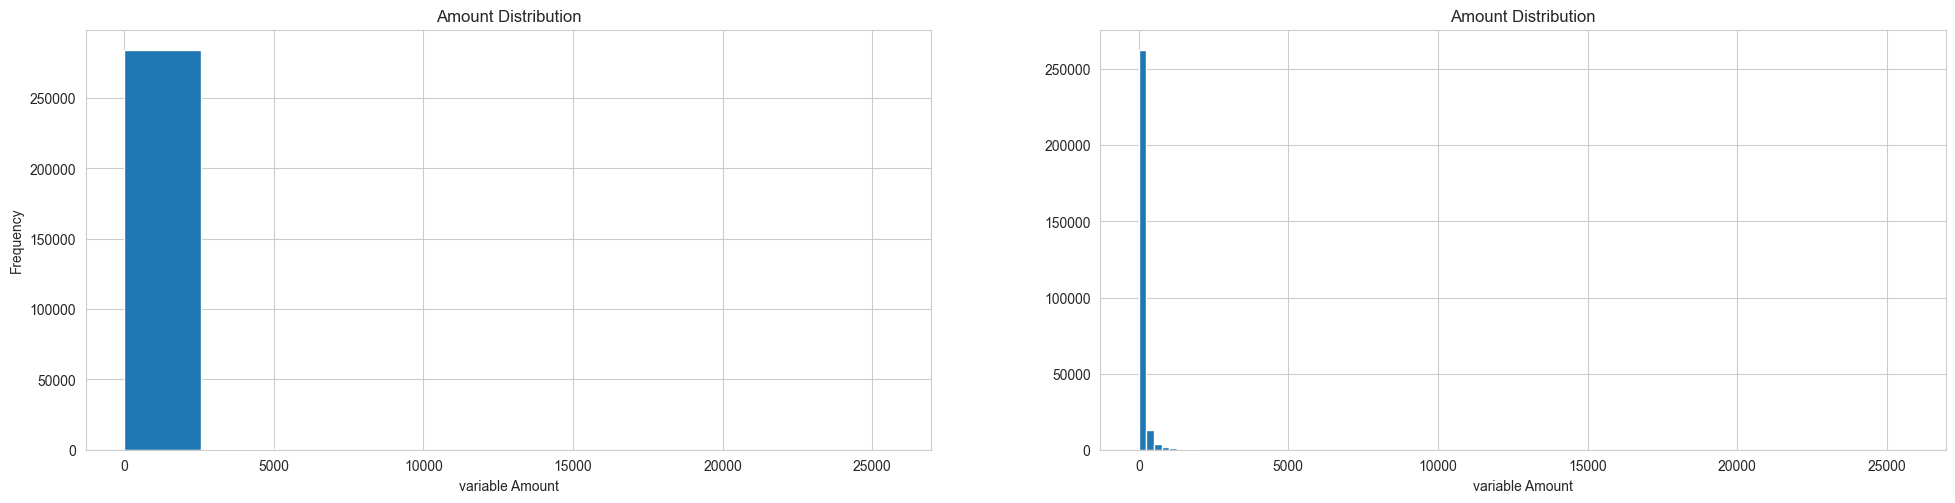

In [23]:
# Amount distribution
plt.figure(figsize=(24, 12))

plt.subplot(2, 2, 1)
plt.title('Amount Distribution')
data['Amount'].astype(int).plot.hist()
plt.xlabel("variable Amount")

plt.subplot(2, 2, 2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(data['Amount'], bins=100)
plt.show()

In [24]:
data = data.drop_duplicates()

duplicate entries were found and removed from the dataset. The 'Amount' feature was scaled to ensure it has a mean of 0 and a standard deviation of 1, making it suitable for model training.

### Scaling Features:

In [25]:
# Scale 'Amount' feature
scaler_amount = StandardScaler()
data['Amount'] = scaler_amount.fit_transform(pd.DataFrame(data['Amount']))

Feature scaling was applied to the 'Amount' feature. No additional feature engineering was performed as the dataset consists of anonymized features.

## Handling Imbalanced Data

In [26]:
# Balance the data with undersampling
def undersample_data(data):
    majority_class = data[data.Class == 0]
    minority_class = data[data.Class == 1]
    majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
    balanced_data = pd.concat([majority_downsampled, minority_class])
    X = balanced_data.drop('Class', axis=1)
    y = balanced_data['Class']
    return X, y

In [27]:
# Balance the data with oversampling
def oversample_data(X, y):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

In [28]:
# Process data for undersampling
X_res_undersample, y_res_undersample = undersample_data(data)
# Process data for oversampling
X = data.drop('Class', axis=1)
y = data['Class']
X_res_oversample, y_res_oversample = oversample_data(X, y)

SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training data to address the class imbalance. This technique generates synthetic samples for the minority class, resulting in a balanced dataset. Additionally, undersampling was performed by randomly reducing the number of majority class samples to match the number of minority class samples.

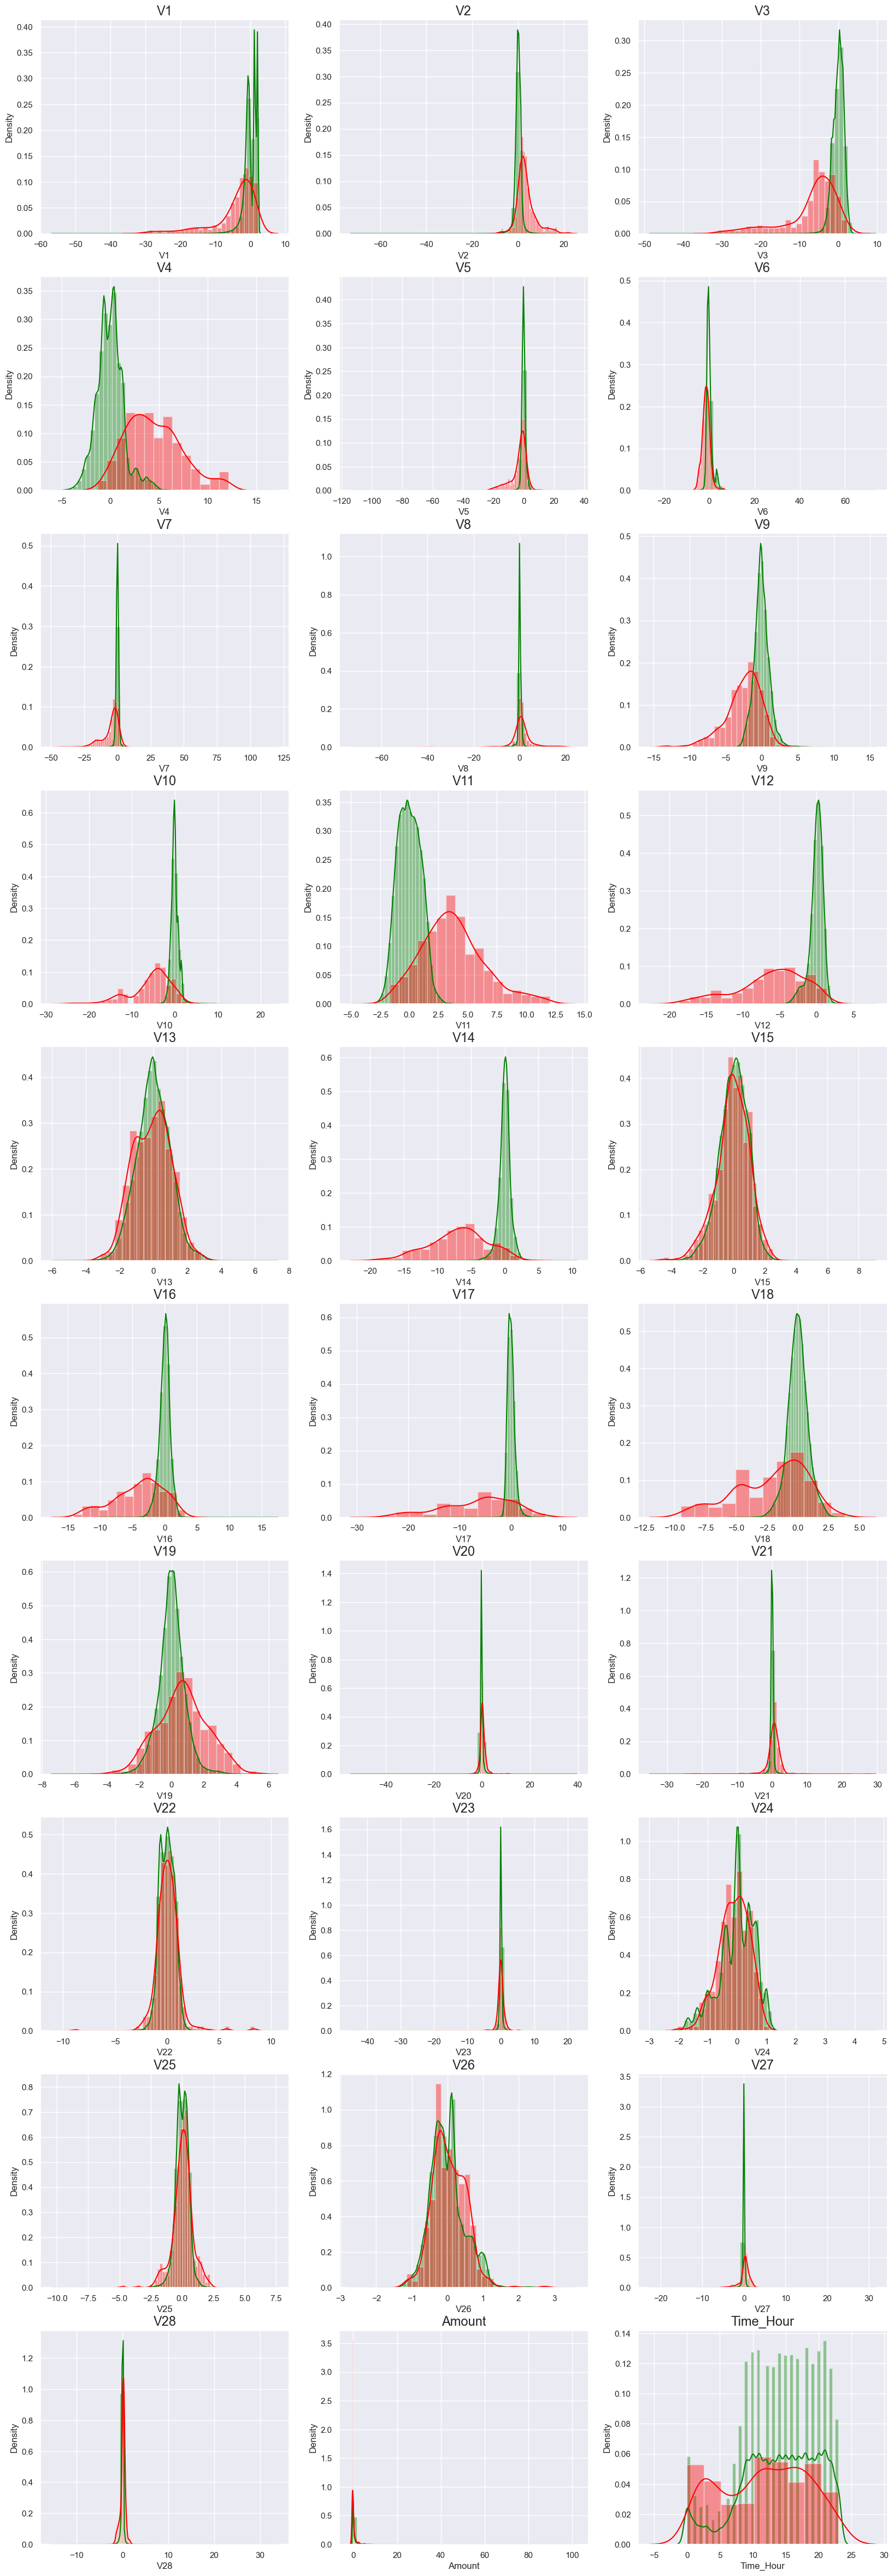

In [29]:
# Plot the histogram of variables to see the skewness
cols = list(X.columns.values)
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10, 3, n + 1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Train/Test Split


In [30]:
# Train/Test split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_res_undersample, y_res_undersample, test_size=0.2, random_state=42, stratify=y_res_undersample)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_res_oversample, y_res_oversample, test_size=0.2, random_state=42, stratify=y_res_oversample)

The data was split into training and testing sets with a ratio of 80:20. This split ensures that we have a sufficient amount of data for training the model while retaining enough data to evaluate the model's performance.


In [31]:
# Create a dictionary with the data to save
data_dict = {
    'X_train_under': X_train_under,
    'X_test_under': X_test_under,
    'y_train_under': y_train_under,
    'y_test_under': y_test_under,
    'X_train_over': X_train_over,
    'X_test_over': X_test_over,
    'y_train_over': y_train_over,
    'y_test_over': y_test_over
}

In [32]:
# Define the base path
base_path = r'C:\Users\shubh\Downloads\upgrad assets\credit card project\credit-card-fraud-detection\data\train_test'

In [33]:
# Loop through the data dictionary and save each DataFrame to a CSV file
for name, df in data_dict.items():
    file_path = f"{base_path}\\{name}.csv"
    df.to_csv(file_path, index=False)

print("All files have been saved successfully.")


All files have been saved successfully.
